# 1) Import Modules

In [1]:
import pandas as pd             # for data cleaning and data pre-processing, CSV file I/O,etc
import numpy as np              # linear algebra & for mathematical computation
import matplotlib.pyplot as plt # for visualization
%matplotlib inline
import seaborn as sns           # for visualization
from collections import Counter # to count occurrences
from tabulate import tabulate   # to make tables for results

import warnings                 # for warning removals in code output
warnings.filterwarnings('ignore')

# Scalers & Encoders
from sklearn.preprocessing import StandardScaler, LabelEncoder
#train-test split
from sklearn.model_selection import train_test_split
# Metrics
from sklearn.metrics import (mean_squared_error, r2_score)
# Model Libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import joblib

import pickle           #to save and load model files as pkl file

### Importing the Processed Dataset (With error handling)

In [2]:
# 1.2) Importing the dataset (With error handling)
file_path = r"C:\Users\DELL\Capstone Project\CAR DETAILS.csv"  # Use raw string or double backslashes
file_name = file_path.split("\\")[-1]  # Split based on backslashes

try:
    # Reading the Excel file into a Pandas DataFrame
    df = pd.read_csv(file_path)  # Use pd.read_excel() for Excel files
    # Store the filename as an attribute in the DataFrame
    df.file_name = file_name
    print(f"\n'{df.file_name}' loaded successfully.")

# Exception to check if the file has some error like no file at the path, etc.
except FileNotFoundError:
    print(f"Error: '{file_name}' not found at the specified location {file_path}.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


'CAR DETAILS.csv' loaded successfully.


## Machine Learning Steps

### Encoding the Dataset 

In [3]:
category_col = df.select_dtypes(include="object").columns
print(f"Categorical Columns in {df.file_name} :\n", category_col)

numerical_col = df.select_dtypes(include="number").columns
print(f"\nNumerical Columns in {df.file_name} :\n", numerical_col)

Categorical Columns in CAR DETAILS.csv :
 Index(['Brand', 'Model', 'Variant', 'Name', 'Fuel', 'Seller_Type',
       'Transmission', 'Owner'],
      dtype='object')

Numerical Columns in CAR DETAILS.csv :
 Index(['Year', 'Km_Driven', 'Selling_Price'], dtype='object')


In [4]:
# One hot encoder
df_one = df.copy()

In [5]:
# # Using Label Encoder to encode categorical data
# label_encoder = LabelEncoder()  # instance of encoder
# # Loop to  encode data in df
# for feature in category_col:
#     df_one[feature] = label_encoder.fit_transform(df[feature])
# df_one.head()
# Using One-Hot Encoding for categorical data
df_one = pd.get_dummies(df_one, columns=category_col, drop_first=True)
# Display the first few rows of the transformed DataFrame
print(df_one.head())


   Year  Km_Driven  Selling_Price  Brand_Audi  Brand_BMW  Brand_Chevrolet  \
0  2007      70000          60000       False      False            False   
1  2007      50000         135000       False      False            False   
2  2012     100000         600000       False      False            False   
3  2017      46000         250000       False      False            False   
4  2014     141000         450000       False      False            False   

   Brand_Daewoo  Brand_Datsun  Brand_Fiat  Brand_Force  ...  Fuel_Electric  \
0         False         False       False        False  ...          False   
1         False         False       False        False  ...          False   
2         False         False       False        False  ...          False   
3         False          True       False        False  ...          False   
4         False         False       False        False  ...          False   

   Fuel_LPG  Fuel_Petrol  Seller_Type_Individual  \
0     False     

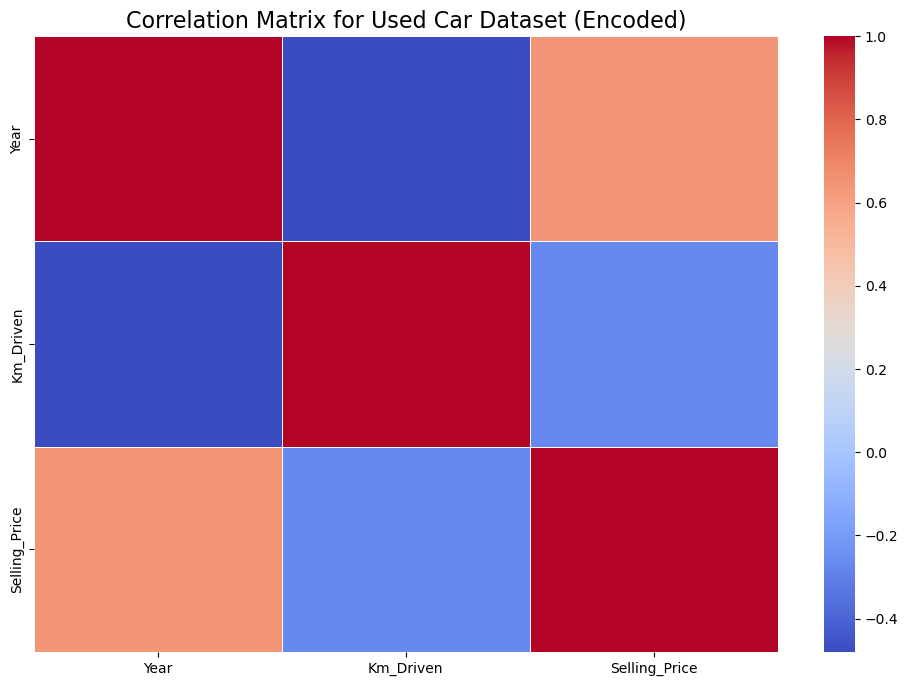

In [6]:
numeric_cols = df_one.select_dtypes(include=['float64', 'int64']).columns
#Compute the correlation matrix on the reduced DataFrame
corr = df_one[numeric_cols].corr()
#Create a heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size if needed
sns.heatmap(corr, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)  # Disable annotations for speed
plt.title("Correlation Matrix for Used Car Dataset (Encoded)", fontsize=16)
plt.show()
#Save the heatmap as an image file
plt.savefig("Correlation_Graph_After_Label_Encoding.png")
plt.close()  # Close the plot to free up memory


### Saving the encoded dataset

In [7]:
import os
# Define the directory path and file path
directory = "../data/processed"
file_path = f"{directory}/cleaned_data.csv"

# Check if the directory exists, if not, create it
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the cleaned DataFrame to the CSV file
cleaned_data = df_one.to_csv(file_path, index=False)

print(f"File saved successfully at: {file_path}")


File saved successfully at: ../data/processed/cleaned_data.csv


Dependant (y) & Independent (x) Features

1. Dropping dependant feature from dataset

In [8]:
x = df_one.drop(["Selling_Price"], axis=1)
y = df_one["Selling_Price"]

print(type(x))
print(type(y))
print(x.shape)
print(y.shape)


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(3202, 2667)
(3202,)


2. Splitting The dataset

In [9]:
# splitting the dataset into 70% training data and 30% test data
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)
print(f"Split Check Test values : {3194 * 0.3} & Train values : {3194 * 0.7}")
# rows , columns
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

Split Check Test values : 958.1999999999999 & Train values : 2235.7999999999997
(2241, 2667)
(961, 2667)
(2241,)
(961,)


3. Standarizing the dataset

In [10]:
sc = StandardScaler()
sc.fit_transform(X_train)
sc.transform(X_test)

array([[-1.22149174,  0.67778744, -0.02112886, ..., -0.61844963,
        -0.05597672, -0.28923296],
       [ 0.27215849, -0.70903274, -0.02112886, ...,  1.61694654,
        -0.05597672, -0.28923296],
       [-2.21725856,  0.4004234 , -0.02112886, ...,  1.61694654,
        -0.05597672, -0.28923296],
       ...,
       [ 1.01898361, -1.40244283, -0.02112886, ..., -0.61844963,
        -0.05597672, -0.28923296],
       [ 0.5211002 , -0.15430467, -0.02112886, ...,  1.61694654,
        -0.05597672, -0.28923296],
       [ 0.02321679,  1.50987955, -0.02112886, ..., -0.61844963,
        -0.05597672, -0.28923296]])

## Model Selection - Evaluation (testing,scoring)

In [11]:

# Initialize the Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42)

# Name of the model
model_name = "Gradient Boosting"

# Initialize variables to keep track of the best model (for comparison with other models)
best_model_name = None
best_r2_score = -float("inf")
best_model = None

# Initialize an empty list to store results
all_results = []


# Function to evaluate regression model
def evaluate_regression_model(model, model_name, X_test, y_test):
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error and R-squared Score
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Display results in a tabular format
    results_table = [
        ["Model", model_name],
        ["Mean Squared Error", mse],
        ["R-squared Score", r2],
    ]
    print(tabulate(results_table, headers=["Metric", "Value"], tablefmt="heavy_grid"))

    # Store results in the dictionary
    return {
        "Model": model_name,
        "Mean Squared Error": mse,
        "R-squared Score": r2,
    }


# Train the Gradient Boosting model
print(f"\n{('-' * 40)}\n{model_name}\n{('-' * 40)}")
model.fit(X_train, y_train)

# Evaluate and store results for the Gradient Boosting model
results = evaluate_regression_model(model, model_name, X_test, y_test)
all_results.append(results)

# Update the best model if needed
if results["R-squared Score"] > best_r2_score:
    best_r2_score = results["R-squared Score"]
    best_model_name = model_name
    best_model = model

# Create a DataFrame from the results
results_df = pd.DataFrame(all_results)

# Sort the dataframe by 'R-squared Score' in descending order
sorted_results_df = results_df.sort_values(by="R-squared Score", ascending=False)

# Display the sorted dataframe
print("\nSorted Models by R-squared Score:")
print(sorted_results_df)

# Print the best model based on R-squared Score
print(f"\nBest Model based on R-squared Score: {best_model_name}")
best_model_name



----------------------------------------
Gradient Boosting
----------------------------------------
Metric              Value
------------------  ------------------
Model               Gradient Boosting
Mean Squared Error  16141566646.470901
R-squared Score     0.7189840604760815

Sorted Models by R-squared Score:
               Model  Mean Squared Error  R-squared Score
0  Gradient Boosting        1.614157e+10         0.718984

Best Model based on R-squared Score: Gradient Boosting


'Gradient Boosting'

## Model performance table (Basic)

In [12]:
model_performance = pd.DataFrame(results_df)
model_performance

,Model,Mean Squared Error,R-squared Score
0,Gradient Boosting,1.614157e+10,0.718984


## Save the best model and Load the model.

In [13]:
# Set up the Gradient Boosting model
final_model = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42)

# Train the Gradient Boosting model
final_model.fit(x, y)

# Save the trained model to a file
joblib.dump(final_model, 'Gradient_boosting_model.pkl')

print("Gradient Boosting model saved successfully!")


Gradient Boosting model saved successfully!


Saving the best model for testing

In [14]:
# Retrieve the Gradient Boosting model from models_dict
models_dict = {
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42),
}

# Since we are focusing on Gradient Boosting, we directly access it
selected_model_name = "Gradient Boosting"
selected_model = models_dict[selected_model_name]

# Print the best model name and its parameters
print(f"Best Selected Model name: '{selected_model_name}' & \nits parameters:\n{selected_model.get_params()}")

# Fit the selected model to the data
final_model = selected_model
final_model.fit(x, y)

# Save the trained selected model to a file (again, if needed)
joblib.dump(final_model, 'Gradient_boosting_model.pkl')
print(f"{selected_model_name} model saved successfully!")

Best Selected Model name: 'Gradient Boosting' & 
its parameters:
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Gradient Boosting model saved successfully!


## Saving Model as pickle file and dumping it to use later on

In [15]:
# Define the directory path
model_directory = "models"

# Check if the directory exists, if not, create it
if not os.path.exists(model_directory):
    os.makedirs(model_directory)

# Save the final model using pickle
model_filename = "gradient_boosting_model"  # You can customize the name as needed
pickle.dump(final_model, open(f"{model_directory}/{model_filename}.pkl", "wb"))

print(f"Model saved successfully at: {model_directory}/{model_filename}.pkl")

Model saved successfully at: models/gradient_boosting_model.pkl


Loading the saved model

In [16]:
f_modelname = "Gradient_boosting_model.pkl"
# Load the model
load_model = pickle.load(open(f"../models/{f_modelname}", "rb"))  # rb = read binary
# Print the name of the loaded model
print(f"Name of loaded Model : {f_modelname}")
# Return the loaded model
load_model

Name of loaded Model : Gradient_boosting_model.pkl


GradientBoostingRegressor(random_state=42)

Generating sample data from cleaned df to test on the trained model.

In [17]:
# Check if the required columns are in X_test
required_columns = ['Brand', 'Fuel', 'Model', 'Owner']

# Print missing columns
missing_columns = [col for col in required_columns if col not in X_test.columns]
if missing_columns:
    print(f"Missing columns in X_test: {missing_columns}")

# If the required columns exist, proceed with encoding
if all(col in X_test.columns for col in required_columns):
    # Recreate X_test to ensure it has the same columns as during training
    X_test_encoded = pd.get_dummies(X_test, columns=required_columns, drop_first=True)

    # Align columns: Ensure X_test_encoded has the same columns as the model expects
    X_test_encoded = X_test_encoded.reindex(columns=load_model.feature_names_in_, fill_value=0)

    # Now you can safely predict
    predictions = load_model.predict(X_test_encoded)
    print("Length of test data: ", len(predictions))
    print(predictions)
else:
    print("Some required columns are missing in the X_test DataFrame.")


Missing columns in X_test: ['Brand', 'Fuel', 'Model', 'Owner']
Some required columns are missing in the X_test DataFrame.


In [18]:
random_datasample = df_one.sample(20)
random_datasample_df = random_datasample.drop("Selling_Price", axis=1)
print(random_datasample_df.shape)
random_datasample_df.head()

(20, 2667)


,Year,Km_Driven,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Daewoo,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,...,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Seller_Type_Individual,Seller_Type_Trustmark Dealer,Transmission_Manual,Owner_Fourth & Above Owner,Owner_Second Owner,Owner_Test Drive Car,Owner_Third Owner
1782,2009,90000,False,False,True,False,False,False,False,False,...,False,False,True,True,False,True,False,False,False,False
3075,2015,68308,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
1655,2013,41041,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
2024,2006,79000,False,False,True,False,False,False,False,False,...,False,False,True,False,False,True,True,False,False,False
1961,2015,50000,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False


Resetting the index as the randomly generated data has no continuos index (wil delete later,just for understanding)

In [19]:
random_datasample_df.reset_index()

,index,Year,Km_Driven,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Daewoo,Brand_Datsun,Brand_Fiat,Brand_Force,...,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Seller_Type_Individual,Seller_Type_Trustmark Dealer,Transmission_Manual,Owner_Fourth & Above Owner,Owner_Second Owner,Owner_Test Drive Car,Owner_Third Owner
0,1782,2009,90000,False,False,True,False,False,False,False,...,False,False,True,True,False,True,False,False,False,False
1,3075,2015,68308,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
2,1655,2013,41041,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
3,2024,2006,79000,False,False,True,False,False,False,False,...,False,False,True,False,False,True,True,False,False,False
4,1961,2015,50000,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False
5,1252,2014,25000,False,False,False,False,False,False,False,...,False,False,True,True,False,True,False,False,False,False
6,2353,2012,35000,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
7,2814,2017,50000,False,False,False,False,False,False,False,...,False,False,True,True,False,True,False,False,False,False
8,929,2017,40000,False,False,False,False,False,False,False,...,False,False,True,True,False,True,False,False,False,False
9,875,2013,71000,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False


Saving the random sample dataset and removing the index

In [20]:
random_datasample_df.to_csv("interimrandom_sample.csv", index=False)

Loading the sample data and checking basics

In [21]:
testsample_df = pd.read_csv("interimrandom_sample.csv")
print(
    "Shape of loaded sample dataframe:",
    testsample_df.shape,
    "\n\nSample Dataframe contents",
)
testsample_df

Shape of loaded sample dataframe: (20, 2667) 

Sample Dataframe contents


,Year,Km_Driven,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Daewoo,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,...,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Seller_Type_Individual,Seller_Type_Trustmark Dealer,Transmission_Manual,Owner_Fourth & Above Owner,Owner_Second Owner,Owner_Test Drive Car,Owner_Third Owner
0,2009,90000,False,False,True,False,False,False,False,False,...,False,False,True,True,False,True,False,False,False,False
1,2015,68308,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
2,2013,41041,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
3,2006,79000,False,False,True,False,False,False,False,False,...,False,False,True,False,False,True,True,False,False,False
4,2015,50000,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False
5,2014,25000,False,False,False,False,False,False,False,False,...,False,False,True,True,False,True,False,False,False,False
6,2012,35000,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
7,2017,50000,False,False,False,False,False,False,False,False,...,False,False,True,True,False,True,False,False,False,False
8,2017,40000,False,False,False,False,False,False,False,False,...,False,False,True,True,False,True,False,False,False,False
9,2013,71000,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False


Making Predictions on sample dataset against the trained model

In [22]:
#Check existing columns in testsample_df
print("Columns in testsample_df:")
print(testsample_df.columns)
# Align columns with the model's expected feature names
testsample_encoded = testsample_df.reindex(columns=load_model.feature_names_in_, fill_value=0)
#Make predictions
predicted_data = load_model.predict(testsample_encoded)
print(f"The predicted data from {f_modelname}: {predicted_data}")

Columns in testsample_df:
Index(['Year', 'Km_Driven', 'Brand_Audi', 'Brand_BMW', 'Brand_Chevrolet',
       'Brand_Daewoo', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Force',
       'Brand_Ford',
       ...
       'Fuel_Electric', 'Fuel_LPG', 'Fuel_Petrol', 'Seller_Type_Individual',
       'Seller_Type_Trustmark Dealer', 'Transmission_Manual',
       'Owner_Fourth & Above Owner', 'Owner_Second Owner',
       'Owner_Test Drive Car', 'Owner_Third Owner'],
      dtype='object', length=2667)
The predicted data from Gradient_boosting_model.pkl: [608742.18859125 498728.18529109 570781.87976534 625571.68707282
 597776.5208583  653574.98023154 669303.04731708 549048.18851913
 535919.74919713 484861.98352013 544753.26021706 542843.03662498
 487020.7532411  484861.98352013 615774.47861491 670574.16524795
 615774.47861491 704459.29329436 628125.31802567 608742.18859125]


Comparision of Actual and Predicted values by the model

In [23]:
# Compare the actual data and predicted data
prediction_data = random_datasample.copy()
prediction_data["predicted_target"] = predicted_data

# Calculate the absolute percentage difference
prediction_data["percentage_difference"] = abs(
    (random_datasample["Selling_Price"] - predicted_data) /
    random_datasample["Selling_Price"]
) * 100

# Print the actual and predicted data
print(f"Actual Data and Predicted Data Comparison based on {f_modelname} model:\n")

# Display the results where the absolute percentage difference is less than or equal to 20%
safe_predictions = prediction_data[prediction_data["percentage_difference"] <= 20]

# Print the safe predictions
print("Safe Predictions:")
print(safe_predictions[["Selling_Price", "predicted_target", "percentage_difference"]])

# Print the count and percentage of safe predictions
safe_percentage = (len(safe_predictions) / len(prediction_data)) * 100
print(f"\nPercentage of Safe Predictions: {safe_percentage:.2f}%")

if safe_percentage >= 90:
    print(f"\nOur model based on '{f_modelname}' is well trained, with {safe_percentage:.2f}% safe predictions.")
else:
    print(f"Our model based on '{f_modelname}' needs more training to improve safety, currently at {safe_percentage:.2f}% safe predictions.")

# Save the results as a DataFrame
final_results_df = prediction_data[["Selling_Price", "predicted_target", "percentage_difference"]]

# Save the results to CSV in the same directory
final_results_df.to_csv('model_predicted_results.csv', index=False)


Actual Data and Predicted Data Comparison based on Gradient_boosting_model.pkl model:

Safe Predictions:
      Selling_Price  predicted_target  percentage_difference
3075         480000     498728.185291               3.901705
1961         500000     597776.520858              19.555304
929          455000     535919.749197              17.784560
802          555000     544753.260217               1.846259
2542         465000     487020.753241               4.735646
2208         450000     484861.983520               7.747107

Percentage of Safe Predictions: 30.00%
Our model based on 'Gradient_boosting_model.pkl' needs more training to improve safety, currently at 30.00% safe predictions.
